### Problem Statement: An education company named X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google. people who land on the website, and provid their email address or phone number, are classified to be a lead.Currently lead conversion rate at X education is around 30%. The company wishes to identify the most potential leads, also known as ‘Hot Leads’ and targets lead conversion rate to be around 80%.

### Analysis Approach:
1) EDA on the dataset. Read the data, find missing values and do the Outlier Analysis:

2) build the model using Logistic regression. 

3) Select the 15 features using RFE

4) check for the correction using VIF. Drop the highly correlated column rerun the model again

5) find the conversion probabablity . create the confusion matrics . Check the accuracy. Check the ROC curve

6) test the model on the test data and check the accuracy score




In [1558]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [1559]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

## 1: Reading and Inspecting the Dataframe

In [1560]:
# Read the data 
DF_Leads = pd.read_csv('Leads.csv')
DF_Leads.shape

(9240, 37)

In [1561]:
# Analyse the data
pd.set_option('display.max_columns', 500)
DF_Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1562]:
DF_Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [1563]:
# Adding up the missing values (column-wise)
print(DF_Leads.isnull().sum(axis = 0))

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [1564]:
# Checking the percentage of missing values
round(100*DF_Leads.isnull().sum()/len(DF_Leads.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

## Rules followed for data cleaning

- Dropping rows and columns
 -   drop unnecessary col. Prospect ID
 -   Drop Columns with more then 30 % null values , Keep only the columns which make business sense
 -   Drop columns which has less then 1 % valid values like yes and No

## Imputing the rows 
- for categorical data 
 -   in uniform dist used .random() 
 -   used mode whereever appicable like city /country column
 -   combine the category holiding less then 10 percent values into on category- others


## 1.1 Removing unnecessary rows and columns

In [1565]:
# Removing rows with less then 2% NaN values
DF_Leads = DF_Leads[~pd.isnull(DF_Leads['Lead Source'])]
DF_Leads = DF_Leads[~pd.isnull(DF_Leads['TotalVisits'])]
DF_Leads = DF_Leads[~pd.isnull(DF_Leads['Page Views Per Visit'])]
DF_Leads = DF_Leads[~pd.isnull(DF_Leads['Last Activity'])]

# Dropping Columns with more then or equal to 30% NaN values
DF_Leads.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], axis=1,inplace = True)

# Drop unnecessary columns
DF_Leads.drop(['Prospect ID'], axis=1,inplace = True)


In [1566]:
DF_Leads.shape

(9074, 32)

## 1.2 Cleaning the Categorical data
- Binary 
- non ordinal categories

In [1567]:
# Binary category
print(DF_Leads['Do Not Email'].value_counts()) # No 8506 / Yes 734
print(DF_Leads['Do Not Call'].value_counts()) # No     9238/  Yes       2  - can be Dropped 
print(DF_Leads['Search'].value_counts())  # No     9226/ Yes      14  - can be Dropped 
print(DF_Leads['Magazine'].value_counts()) # No    9240 / yes 0  - Should be Dropped 
print(DF_Leads['Newspaper Article'].value_counts())  # No     9238/  yes 2 - can be Dropped 
print(DF_Leads['X Education Forums'].value_counts())  #No     9239 /Yes   1  - can be Dropped 
print(DF_Leads['Newspaper'].value_counts())  # No     9239 /Yes       1 - can be Dropped
print(DF_Leads['Digital Advertisement'].value_counts())  # No     9236/Yes       4 -- can be Dropped
print(DF_Leads['Receive More Updates About Our Courses'].value_counts()) #No    9240 /yes 0 -- Should be Dropped
print(DF_Leads['Update me on Supply Chain Content'].value_counts()) #No    9240 /yes 0 -- Should be Dropped
print(DF_Leads['Get updates on DM Content'].value_counts()) #No    9240/ yes 0 -- Should be Dropped
print(DF_Leads['I agree to pay the amount through cheque'].value_counts()) #No    9240/yes 0 -- Should be Dropped
print(DF_Leads['A free copy of Mastering The Interview'].value_counts()) #No     6352/Yes    2888
print(DF_Leads['Through Recommendations'].value_counts()) #No     9233/Yes       7  -- can be Dropped

print(DF_Leads['Converted'].value_counts())  # 0    5679/1    3561 

print(DF_Leads['What matters most to you in choosing a course'].value_counts()) #Better Career Prospects/others(3) -- column Should be Dropped


No     8358
Yes     716
Name: Do Not Email, dtype: int64
No     9072
Yes       2
Name: Do Not Call, dtype: int64
No     9060
Yes      14
Name: Search, dtype: int64
No    9074
Name: Magazine, dtype: int64
No     9072
Yes       2
Name: Newspaper Article, dtype: int64
No     9073
Yes       1
Name: X Education Forums, dtype: int64
No     9073
Yes       1
Name: Newspaper, dtype: int64
No     9070
Yes       4
Name: Digital Advertisement, dtype: int64
No    9074
Name: Receive More Updates About Our Courses, dtype: int64
No    9074
Name: Update me on Supply Chain Content, dtype: int64
No    9074
Name: Get updates on DM Content, dtype: int64
No    9074
Name: I agree to pay the amount through cheque, dtype: int64
No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64
No     9067
Yes       7
Name: Through Recommendations, dtype: int64
0    5639
1    3435
Name: Converted, dtype: int64
Better Career Prospects      6370
Other                           1
Flexibility & Conv

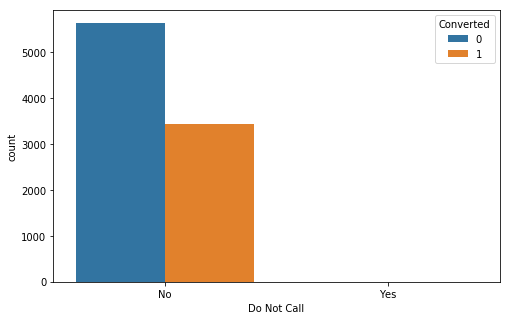

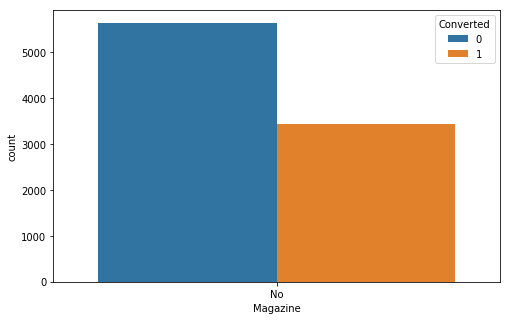

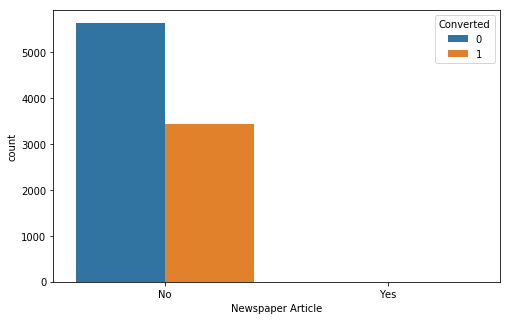

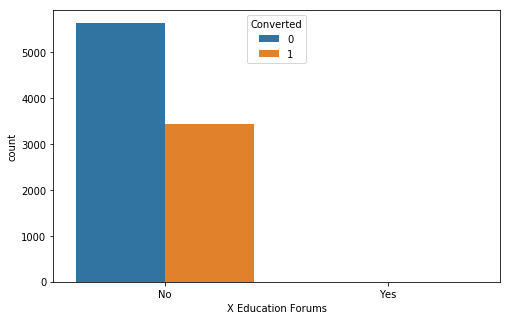

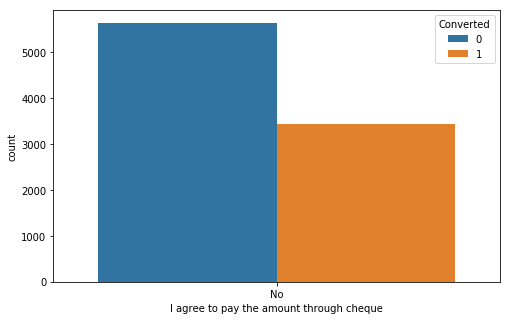

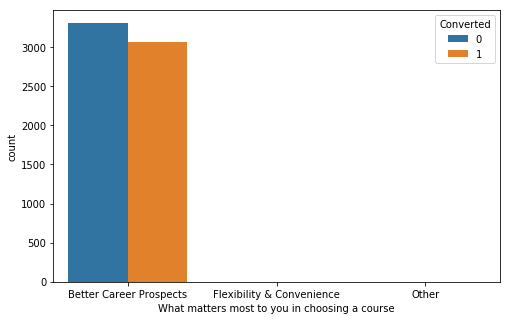

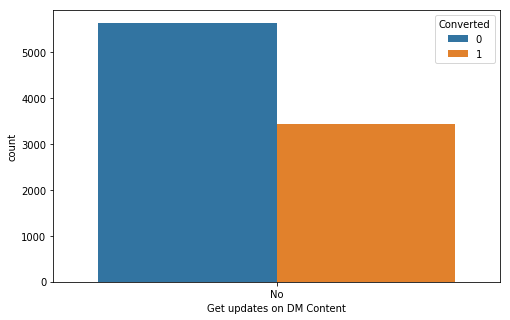

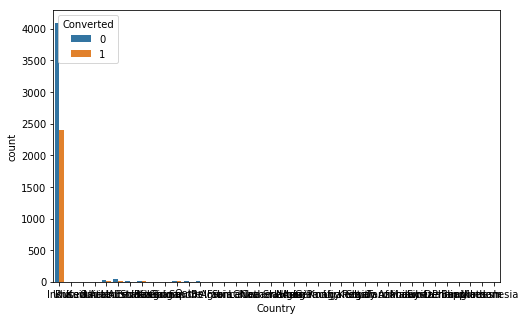

In [1568]:
# anlaysis of categorical variables - univariate
plt.figure(figsize=(8, 5))
sns.countplot(x='Do Not Call',hue = 'Converted', data=DF_Leads)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Magazine',hue = 'Converted', data=DF_Leads)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Newspaper Article',hue = 'Converted', data=DF_Leads)
plt.show()


plt.figure(figsize=(8, 5))
sns.countplot(x='X Education Forums',hue = 'Converted', data=DF_Leads)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='I agree to pay the amount through cheque',hue = 'Converted', data=DF_Leads)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='What matters most to you in choosing a course',hue = 'Converted', data=DF_Leads)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Get updates on DM Content',hue = 'Converted', data=DF_Leads)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Country',hue = 'Converted', data=DF_Leads)
plt.show()



In [1569]:
# From the above analyis Columns which can be dropped safely and does not seem to have a impact on analysis are as below
# These columns have less then 0.5% valid values

#Do Not Call
#Magazine
#Newspaper Article
#X Education Forums
#Newspaper
#Receive More Updates About Our Courses
#Update me on Supply Chain Content
#Get updates on DM Content
#I agree to pay the amount through cheque
#What matters most to you in choosing a course
#Country

DF_Leads.drop(['Do Not Call','Magazine','Newspaper Article',
               'X Education Forums','Newspaper','Receive More Updates About Our Courses',
               'Update me on Supply Chain Content','Get updates on DM Content',
               'I agree to pay the amount through cheque',
               'What matters most to you in choosing a course','Country'], 
              axis=1, inplace =True)


In [1570]:
# Checking the percentage of missing values
round(100*DF_Leads.isnull().sum()/len(DF_Leads.index),2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Specialization                            15.77
How did you hear about X Education        24.25
What is your current occupation           29.57
Search                                     0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
Tags                                      36.67
Lead Quality                              52.02
Lead Profile                              29.78
City                                      15.64
A free copy of Mastering The Interview     0.00
Last Notable Activity                   

In [1571]:
# Non ordinal categories
print(DF_Leads['Specialization'].value_counts())  #Select (1942)/Finance Management/Human Resource Management/Marketing Management/Operations Management/Business Administration/IT Projects Management/Supply Chain Management/Banking, Investment And Insurance/Media and Advertising 
print(DF_Leads['How did you hear about X Education'].value_counts())  # Select(5043)/Online Search/Word Of Mouth/Student of SomeSchool/Other/Multiple Sources/Advertisements/Social Media/Email/SMS
print(DF_Leads['What is your current occupation'].value_counts())  # Unemployed/Working Professional/Student/Other/Housewife
print(DF_Leads['Tags'].value_counts()) #Will revert after reading the email/Ringing/Interested in other courses/Already a student/Closed by Horizzon/switched off/Busy/Lost to EINS/others
print(DF_Leads['Lead Quality'].value_counts()) #Might be/Not Sure/High in Relevance/Worst/Low in Relevance
print(DF_Leads['Lead Profile'].value_counts()) #Select(4146)/Potential Lead/Other Leads/Student of SomeSchool/Lateral Student/Dual Specialization Student
print(DF_Leads['City'].value_counts()) #Mumbai(3222)/Select(2249)/Thane & Outskirts/other city

Select                               1851
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64
Select                   4886
Online Search             808
Word Of Mouth             347
Student of SomeSchool     310
Other                     186
Multiple Sources 

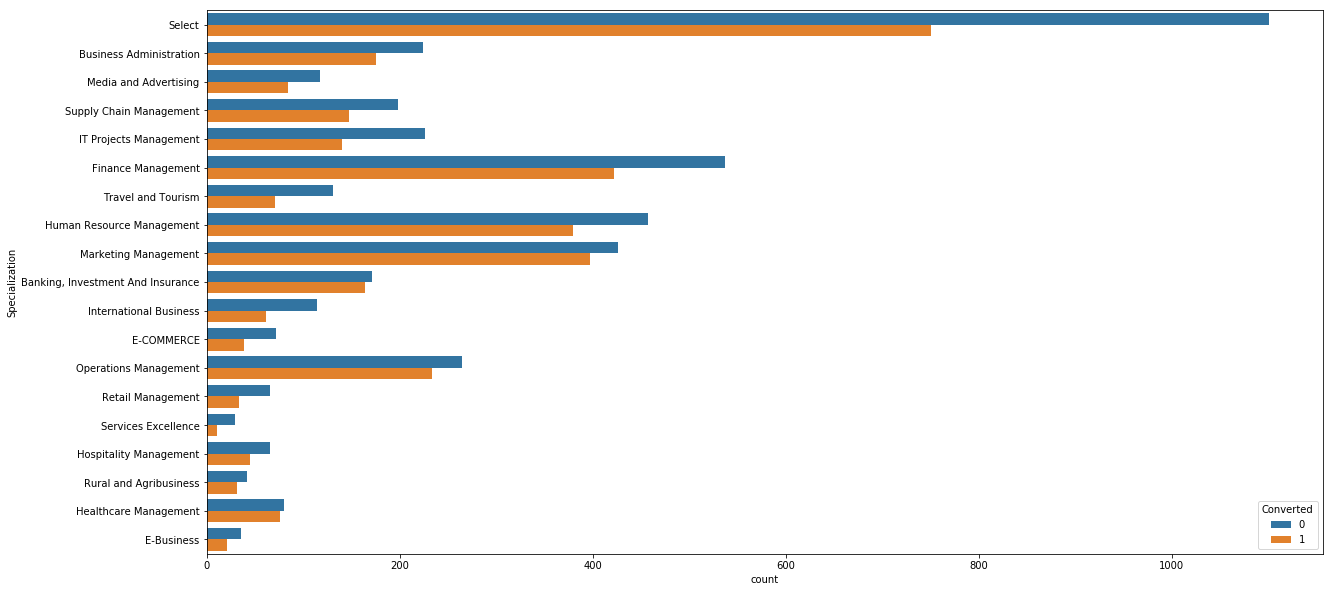

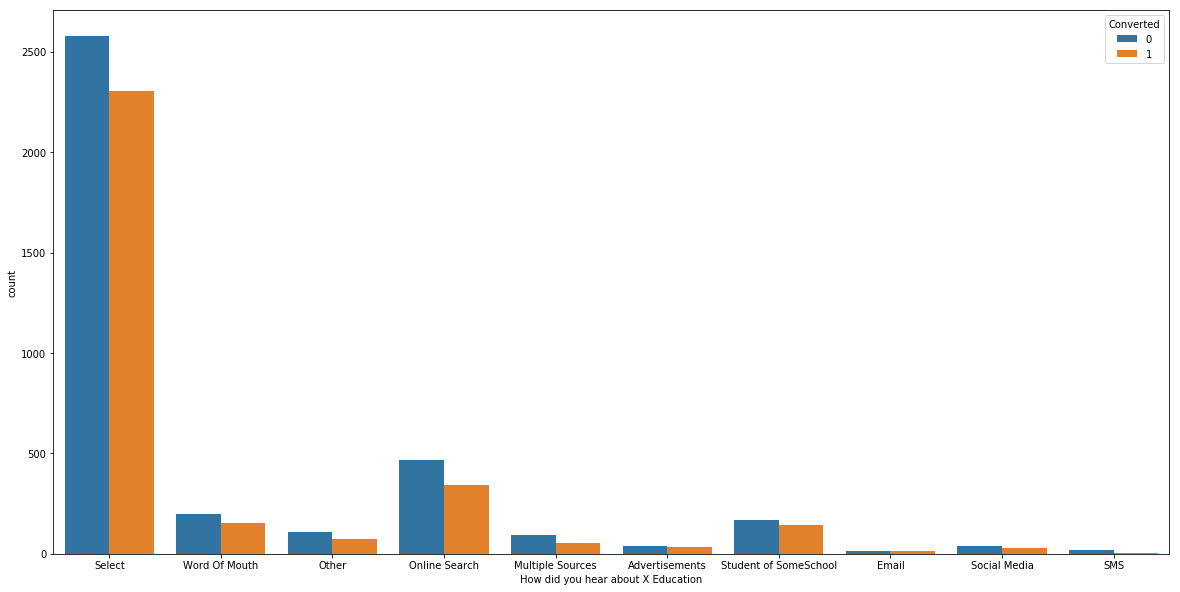

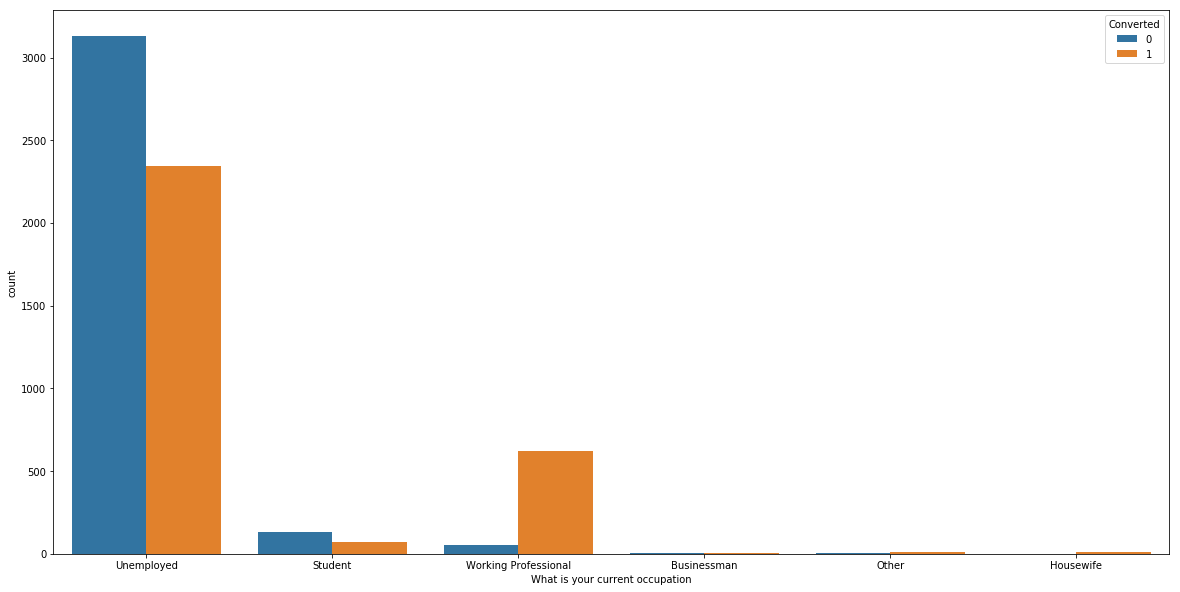

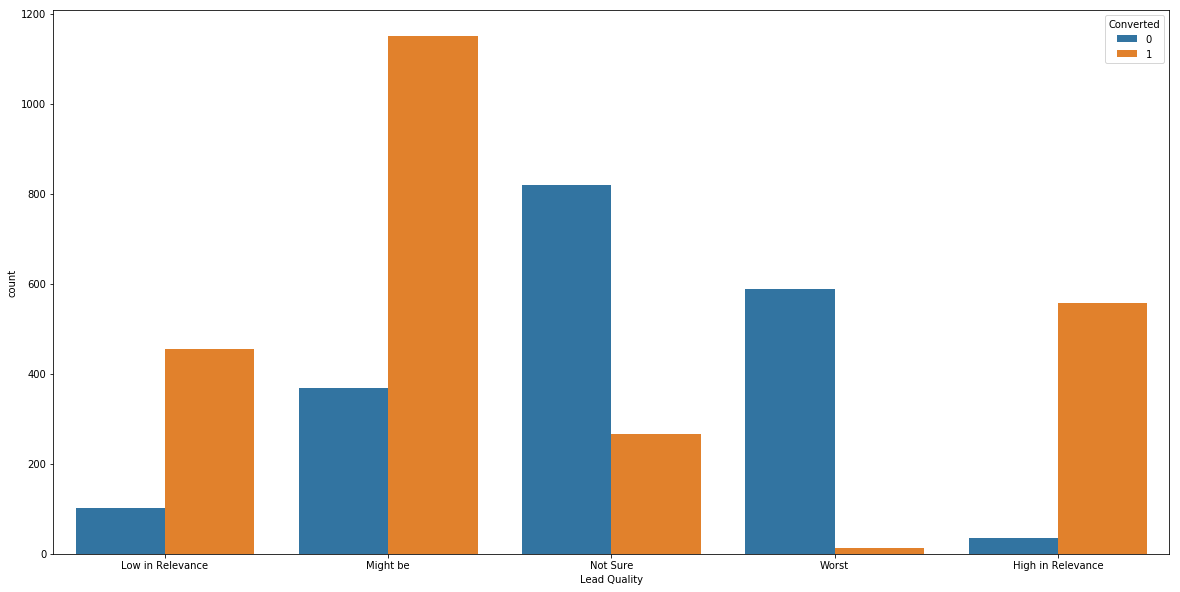

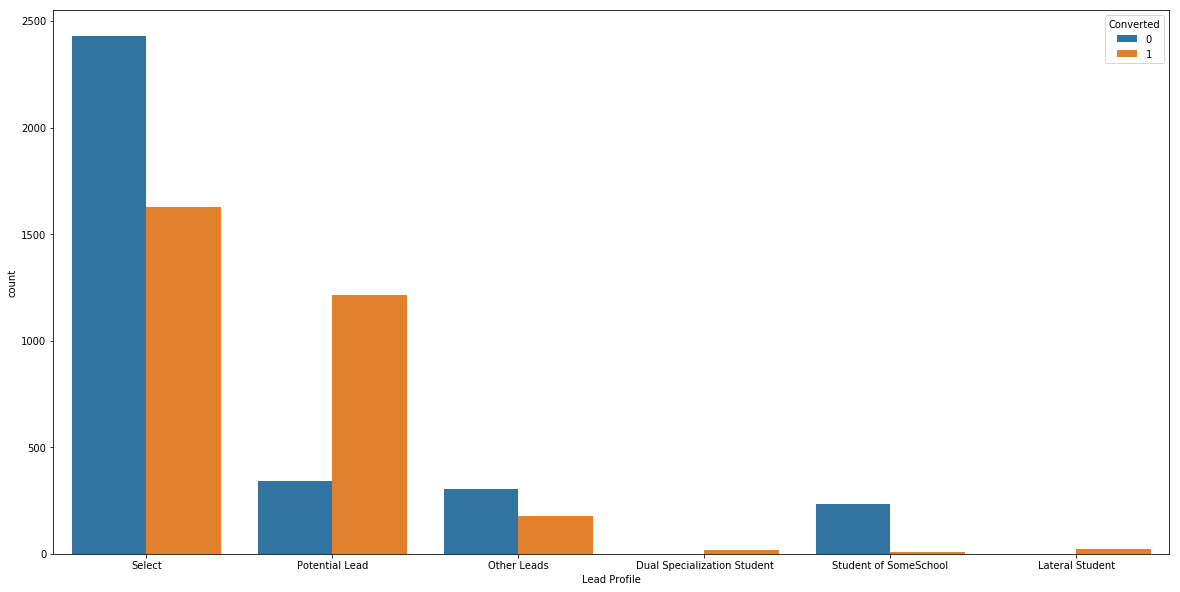

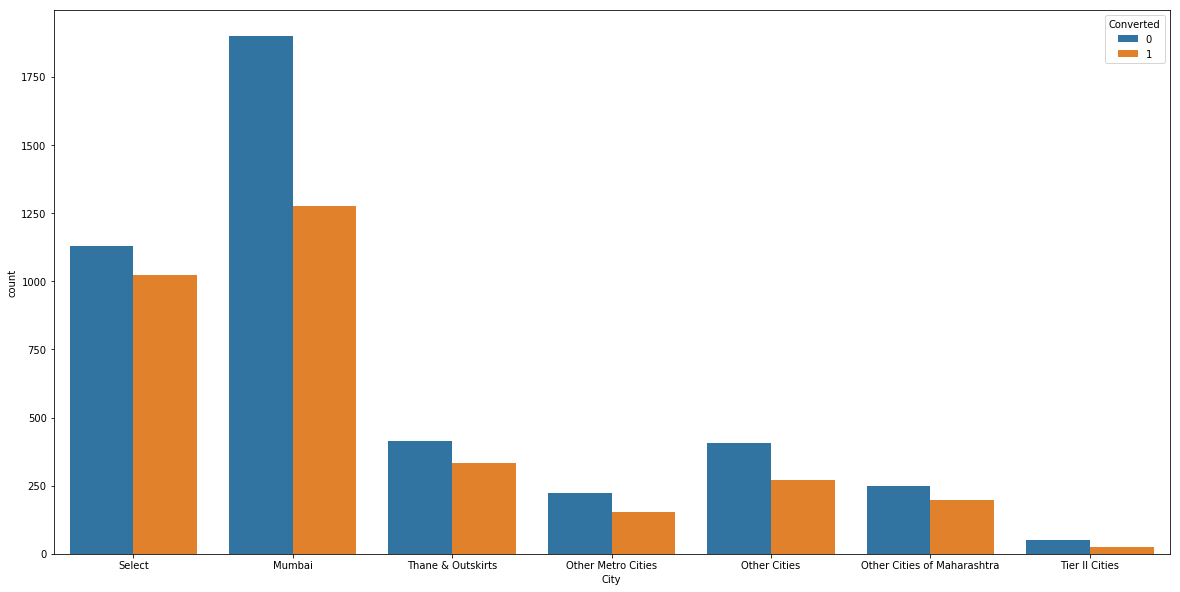

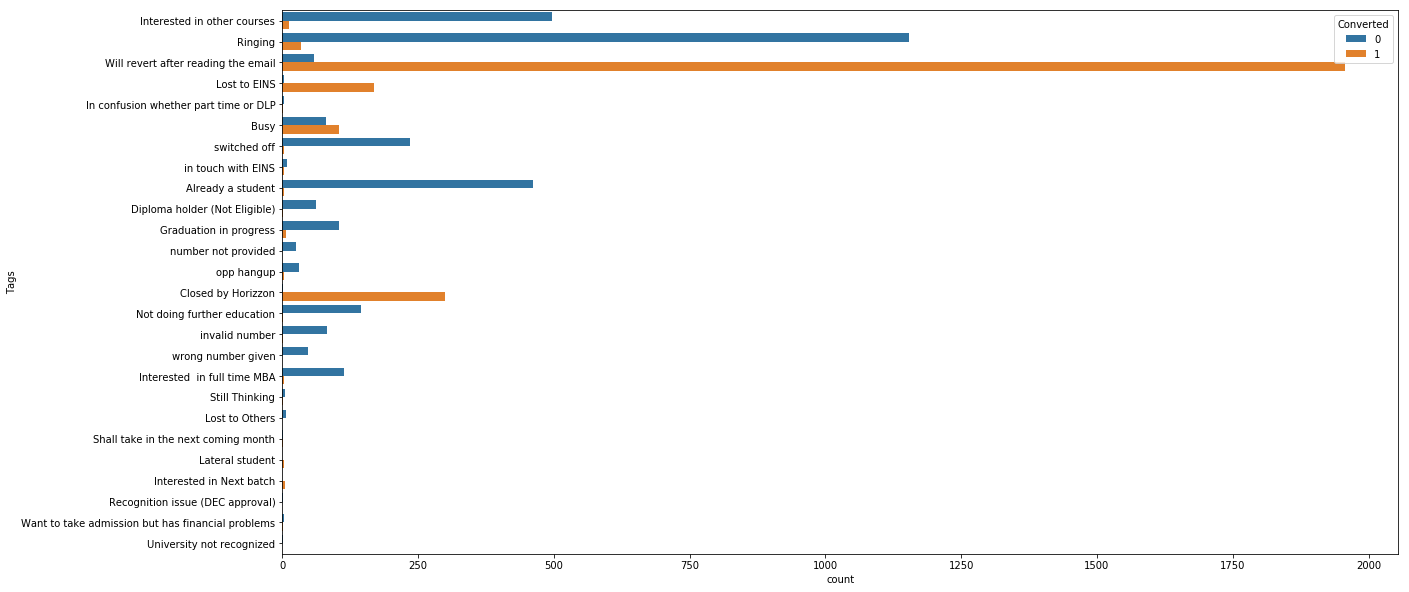

In [1572]:
# anlaysis of categorical variables - univariate

plt.figure(figsize=(20, 10))
sns.countplot(y='Specialization',hue="Converted", data=DF_Leads)
plt.show()

plt.figure(figsize=(20, 10))
sns.countplot(x='How did you hear about X Education',hue="Converted", data=DF_Leads)
plt.show()


plt.figure(figsize=(20, 10))
sns.countplot(x='What is your current occupation',hue="Converted", data=DF_Leads)
plt.show()

plt.figure(figsize=(20, 10))
sns.countplot(x='Lead Quality',hue="Converted", data=DF_Leads)
plt.show()

plt.figure(figsize=(20, 10))
sns.countplot(x='Lead Profile',hue="Converted", data=DF_Leads)
plt.show()

plt.figure(figsize=(20, 10))
sns.countplot(x='City',hue="Converted", data=DF_Leads)
plt.show()

plt.figure(figsize=(20, 10))
sns.countplot(y='Tags',hue="Converted", data=DF_Leads)
plt.show()


## Observation:
**Following are the observations**

- City
    - 'Mumbai' is the mode. Maxium people taking course are from in and around Mumbai. There are some 'select' category present which need to be replaced. But % of people converting from all cities is almost similar. This variable may not be significant, so can drop this variable
- Lead Profile
    - 'Potential Lead is the category which has highest conversion'. There are some 'select' category present which need to be replace with random values.
- Specialization
    - 'Finance /Marketing/HR/Operational Management' categories are opting more for the course and have more conversion
- How did you hear about X Education
    - 'Online Search' category has high value and has more conversion rate. There are some 'select' category present which need to be replaced
- What is your current occupation
    - 'Unemployed/Working Professional' Have more conversion rate.
- Tags
    - 'Will revert after reading the email' have high conversion rate
- Lead Quality
    - 'Might be/High in Relevance/Low in Relevance' have high Conversion rate



In [1573]:
# replacing invalid value 'Select' to NaN

# handling Select values in columns City/Lead Profile/Specialization/How did you hear about X Education
DF_Leads.drop(['City'], 
              axis=1, inplace =True)

DF_Leads['Lead Profile'] = DF_Leads['Lead Profile'].replace("Select", np.nan)
DF_Leads['Specialization'] = DF_Leads['Specialization'].replace("Select", np.nan)
DF_Leads['How did you hear about X Education'] = DF_Leads['How did you hear about X Education'].replace("Select", np.nan)


In [1574]:
# Based on above analysis , Need to impute the 8 categorical columns with mode value and random values

#Specialization
#How did you hear about X Education
#What is your current occupation
#Tags
#Lead Quality
#Lead Profile 

#using mode values for imputing categorical variable 
DF_Leads.loc[pd.isnull(DF_Leads['What is your current occupation']), ['What is your current occupation']] = 'Unemployed'  # mode is Unemployed

# Filling the nan values randomly using random() function 
DF_Leads["Specialization"].fillna(lambda x: random.choice(DF_Leads[DF_Leads['Specialization'] != np.nan]["Specialization"]), inplace =True)
DF_Leads["How did you hear about X Education"].fillna(lambda x: random.choice(DF_Leads[DF_Leads['How did you hear about X Education'] != np.nan]["How did you hear about X Education"]), inplace =True)
DF_Leads["Lead Profile"].fillna(lambda x: random.choice(DF_Leads[DF_Leads['Lead Profile'] != np.nan]["Lead Profile"]), inplace =True)
DF_Leads["Tags"].fillna(lambda x: random.choice(DF_Leads[DF_Leads['Tags'] != np.nan]["Tags"]), inplace =True)
DF_Leads["Lead Quality"].fillna(lambda x: random.choice(DF_Leads[DF_Leads['Lead Quality'] != np.nan]["Lead Quality"]), inplace =True)

In [1575]:
# Checking the percentage of missing values again
round(100*DF_Leads.isnull().sum()/len(DF_Leads.index),2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
How did you hear about X Education        0.0
What is your current occupation           0.0
Search                                    0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                                      0.0
Lead Quality                              0.0
Lead Profile                              0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [1576]:
# All the null values has been removed/imputed. Lets check how much information loss has happened
DF_Leads.shape   # from 9240 to 9074 - not much info loss

(9074, 20)

## 1.3 Outlier Analysis and treatment

In [1577]:
# let's look at the statistical aspects of the dataframe
# Checking outliers at 25%,50%,75%,90%,95% and 99%
DF_Leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
90%,650276.800000,1.000000,7.000000,1373.000000,5.000000
95%,655344.450000,1.000000,10.000000,1557.000000,6.000000
99%,659563.350000,1.000000,17.000000,1839.000000,9.000000


In [1578]:
# All the 3 columns have outlier TotalVisits/Total Time Spent on Website/Page Views Per Visit
# As we can see that there is lot of difference in values at 99% and max value
# outlier treatment for exports
Q1 = DF_Leads.TotalVisits.quantile(0.00)
Q3 = DF_Leads.TotalVisits.quantile(0.99)
IQR = Q3 - Q1
DF_Leads = DF_Leads[(DF_Leads.TotalVisits >= Q1 - 1.5*IQR) & (DF_Leads.TotalVisits <= Q3 + 1.5*IQR)]
print(DF_Leads.shape)

'''
# outlier treatment for exports
Q1 = DF_Leads['Total Time Spent on Website'].quantile(0.05)
Q3 = DF_Leads['Total Time Spent on Website'].quantile(0.95)
IQR = Q3 - Q1
DF_Leads = DF_Leads[(DF_Leads['Total Time Spent on Website'] >= Q1 - 1.5*IQR) & (DF_Leads['Total Time Spent on Website'] <= Q3 + 1.5*IQR)]
print(DF_Leads.shape)
'''

# outlier treatment for Page Views Per Visit
Q1 = DF_Leads['Page Views Per Visit'].quantile(0.00)
Q3 = DF_Leads['Page Views Per Visit'].quantile(0.99)
IQR = Q3 - Q1
DF_Leads = DF_Leads[(DF_Leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (DF_Leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]
print(DF_Leads.shape)

(9067, 20)
(9066, 20)


In [1579]:
# Step 2 : Check for duplicate rows
print(DF_Leads.shape)
DF_Leads.drop_duplicates(keep='first',inplace=True)
print(DF_Leads.shape)

# As we can see number of rows and columns are still same. There are no duplicate present in the data 

(9066, 20)
(9066, 20)


## 2.0: Data Preparation

### Handling Categorical Data 

In [1580]:
DF_Leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Search,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,<function <lambda> at 0x1c2f06a9d8>,<function <lambda> at 0x1c2f06aea0>,Unemployed,No,No,No,Interested in other courses,Low in Relevance,<function <lambda> at 0x1c2f06af28>,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,<function <lambda> at 0x1c2f06a9d8>,<function <lambda> at 0x1c2f06aea0>,Unemployed,No,No,No,Ringing,<function <lambda> at 0x1c2f06a378>,<function <lambda> at 0x1c2f06af28>,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,<function <lambda> at 0x1c2f06aea0>,Student,No,No,No,Will revert after reading the email,Might be,Potential Lead,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,No,No,No,Ringing,Not Sure,<function <lambda> at 0x1c2f06af28>,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,<function <lambda> at 0x1c2f06a9d8>,Other,Unemployed,No,No,No,Will revert after reading the email,Might be,<function <lambda> at 0x1c2f06af28>,No,Modified


## 2.1 Converting Binary variable into 0 and 1

In [1581]:
# Binary category

# List of variables to map
varlist =  ['Do Not Email', 'Search', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
DF_Leads[varlist] = DF_Leads[varlist].apply(binary_map)

## 2.2 Non Ordinal Categories: Combining the categories based on frequency

In [1582]:
# Non Ordinal Categories
print(DF_Leads['Lead Origin'].value_counts()) # Landing Page Submission/API/Lead Add Form/Lead Import/Quick Add Form
print(DF_Leads['Lead Source'].value_counts()) # Google/Direct Traffic /Olark Chat/Organic Search/Reference/Welingak Website/Referral Sites/Facebook others
print(DF_Leads['Last Activity'].value_counts()) # Email Opened/SMS Sent /Olark Chat Conversation/Page Visited on Website/Converted to Lead/Email Bounced/Email Link Clicked/Form Submitted on Website/others
print(DF_Leads['Specialization'].value_counts())  #Select (1942)/Finance Management/Human Resource Management/Marketing Management/Operations Management/Business Administration/IT Projects Management/Supply Chain Management/Banking, Investment And Insurance/Media and Advertising 
print(DF_Leads['How did you hear about X Education'].value_counts())  # Select(5043)/Online Search/Word Of Mouth/Student of SomeSchool/Other/Multiple Sources/Advertisements/Social Media/Email/SMS
print(DF_Leads['What is your current occupation'].value_counts())  # Unemployed/Working Professional/Student/Other/Housewife
print(DF_Leads['Tags'].value_counts()) #Will revert after reading the email/Ringing/Interested in other courses/Already a student/Closed by Horizzon/switched off/Busy/Lost to EINS/others
print(DF_Leads['Lead Quality'].value_counts()) #Might be/Not Sure/High in Relevance/Worst/Low in Relevance
print(DF_Leads['Lead Profile'].value_counts()) #Potential Lead/Other Leads/Student of SomeSchool/Lateral Student/Dual Specialization Student
print(DF_Leads['Last Notable Activity'].value_counts()) #Medium    3839/High      2203/Low         31

# Non Ordinal Categories: Combining the categories based on frequency
# Lead Origin 
series = pd.value_counts(DF_Leads['Lead Origin'])
mask = (series/series.sum() * 100).lt(10)  # having freq less then 10%
# To replace df['column'] use np.where I.e 
DF_Leads['Lead Origin'] = np.where(DF_Leads['Lead Origin'].isin(series[mask].index),'LeadOriginOther',DF_Leads['Lead Origin'])
print(DF_Leads['Lead Origin'].value_counts())

# Lead Source 
series = pd.value_counts(DF_Leads['Lead Source'])
mask = (series/series.sum() * 100).lt(10)  # having freq less then 10%
# To replace df['column'] use np.where I.e 
DF_Leads['Lead Source'] = np.where(DF_Leads['Lead Source'].isin(series[mask].index),'LeadSourceOther',DF_Leads['Lead Source'])
print(DF_Leads['Lead Source'].value_counts())

# Last Activity 
series = pd.value_counts(DF_Leads['Last Activity'])
mask = (series/series.sum() * 100).lt(5)  # having freq less then 10%
# To replace df['column'] use np.where I.e 
DF_Leads['Last Activity'] = np.where(DF_Leads['Last Activity'].isin(series[mask].index),'LastActivityOther',DF_Leads['Last Activity'])
print(DF_Leads['Last Activity'].value_counts())



# Specialization 
series = pd.value_counts(DF_Leads['Specialization'])
mask = (series/series.sum() * 100).lt(5)  # having freq less then 10%
# To replace df['column'] use np.where I.e 
DF_Leads['Specialization'] = np.where(DF_Leads['Specialization'].isin(series[mask].index),'SpecializationOther',DF_Leads['Specialization'])
print(DF_Leads['Specialization'].value_counts())

# How did you hear about X Education 
series = pd.value_counts(DF_Leads['How did you hear about X Education'])
mask = (series/series.sum() * 100).lt(10)  # having freq less then 10%
# To replace df['column'] use np.where I.e 
DF_Leads['How did you hear about X Education'] = np.where(DF_Leads['How did you hear about X Education'].isin(series[mask].index),'HowdidyouhearaboutXEducationOther',DF_Leads['How did you hear about X Education'])
print(DF_Leads['How did you hear about X Education'].value_counts())

# What is your current occupation 
series = pd.value_counts(DF_Leads['What is your current occupation'])
mask = (series/series.sum() * 100).lt(10)  # having freq less then 10%
# To replace df['column'] use np.where I.e 
DF_Leads['What is your current occupation'] = np.where(DF_Leads['What is your current occupation'].isin(series[mask].index),'WhatisyourcurrentoccupationOther',DF_Leads['What is your current occupation'])
print(DF_Leads['What is your current occupation'].value_counts())

# Tags 
series = pd.value_counts(DF_Leads['Tags'])
mask = (series/series.sum() * 100).lt(10)  # having freq less then 10%
# To replace df['column'] use np.where I.e 
DF_Leads['Tags'] = np.where(DF_Leads['Tags'].isin(series[mask].index),'TagsOther',DF_Leads['Tags'])
print(DF_Leads['Tags'].value_counts())

# Lead Quality 
series = pd.value_counts(DF_Leads['Lead Quality'])
mask = (series/series.sum() * 100).lt(5)  # having freq less then 10%
# To replace df['column'] use np.where I.e 
DF_Leads['Lead Quality'] = np.where(DF_Leads['Lead Quality'].isin(series[mask].index),'LeadQualityOther',DF_Leads['Lead Quality'])
print(DF_Leads['Lead Quality'].value_counts())


# Lead Profile 
series = pd.value_counts(DF_Leads['Lead Profile'])
mask = (series/series.sum() * 100).lt(5)  # having freq less then 10%
# To replace df['column'] use np.where I.e 
DF_Leads['Lead Profile'] = np.where(DF_Leads['Lead Profile'].isin(series[mask].index),'LeadProfileOther',DF_Leads['Lead Profile'])
print(DF_Leads['Lead Profile'].value_counts())


# Last Notable Activity 
series = pd.value_counts(DF_Leads['Last Notable Activity'])
mask = (series/series.sum() * 100).lt(5)  # having freq less then 10%
# To replace df['column'] use np.where I.e 
DF_Leads['Last Notable Activity'] = np.where(DF_Leads['Last Notable Activity'].isin(series[mask].index),'LastNotableActivityOther',DF_Leads['Last Notable Activity'])
print(DF_Leads['Last Notable Activity'].value_counts())


# Converting these columns back to string type so as to feed them into get dummy function to create dummy coulmns

DF_Leads['Lead Origin'] = DF_Leads['Lead Origin'].astype(str)
DF_Leads['Lead Source'] = DF_Leads['Lead Source'].astype(str)
DF_Leads['Last Activity'] = DF_Leads['Last Activity'].astype(str)
DF_Leads['Specialization'] = DF_Leads['Specialization'].astype(str)
DF_Leads['How did you hear about X Education'] = DF_Leads['How did you hear about X Education'].astype(str)
DF_Leads['What is your current occupation'] = DF_Leads['What is your current occupation'].astype(str)
DF_Leads['Tags'] = DF_Leads['Tags'].astype(str)
DF_Leads['Lead Quality'] = DF_Leads['Lead Quality'].astype(str)
DF_Leads['Lead Profile'] = DF_Leads['Lead Profile'].astype(str)
DF_Leads['Last Notable Activity'] = DF_Leads['Last Notable Activity'].astype(str)


Landing Page Submission    4878
API                        3577
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2538
Olark Chat           1753
Organic Search       1153
Reference             443
Welingak Website      129
Referral Sites        123
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
welearnblog_Home        1
testone                 1
Pay per Click Ads       1
NC_EDM                  1
WeLearn                 1
youtubechannel          1
blog                    1
Name: Lead Source, dtype: int64
Email Opened                    3431
SMS Sent                        2715
Olark Chat Conversation          972
Page Visited on Website          634
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
For

In [1583]:
# Check the data type
DF_Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9066 entries, 0 to 9239
Data columns (total 20 columns):
Lead Number                               9066 non-null int64
Lead Origin                               9066 non-null object
Lead Source                               9066 non-null object
Do Not Email                              9066 non-null int64
Converted                                 9066 non-null int64
TotalVisits                               9066 non-null float64
Total Time Spent on Website               9066 non-null int64
Page Views Per Visit                      9066 non-null float64
Last Activity                             9066 non-null object
Specialization                            9066 non-null object
How did you hear about X Education        9066 non-null object
What is your current occupation           9066 non-null object
Search                                    9066 non-null int64
Digital Advertisement                     9066 non-null int64
Through Recomme

## 2.3 Creating Dummy Categorical variable for Binary and Non Ordinal categories

In [1584]:
# Get dummies
DF_Leads = pd.get_dummies(DF_Leads, prefix_sep='_', drop_first=True)

# DF_Leads head
DF_Leads.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_LeadOriginOther,Lead Source_Google,Lead Source_LeadSourceOther,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_LastActivityOther,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_SpecializationOther,How did you hear about X Education_HowdidyouhearaboutXEducationOther,What is your current occupation_WhatisyourcurrentoccupationOther,Tags_Ringing,Tags_TagsOther,Tags_Will revert after reading the email,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_LeadProfileOther,Lead Profile_Other Leads,Lead Profile_Potential Lead,Last Notable Activity_LastNotableActivityOther,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,660719,0,0,1.0,305,1.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4,660681,0,1,2.0,1428,1.0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [1585]:
DF_Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9066 entries, 0 to 9239
Data columns (total 41 columns):
Lead Number                                                             9066 non-null int64
Do Not Email                                                            9066 non-null int64
Converted                                                               9066 non-null int64
TotalVisits                                                             9066 non-null float64
Total Time Spent on Website                                             9066 non-null int64
Page Views Per Visit                                                    9066 non-null float64
Search                                                                  9066 non-null int64
Digital Advertisement                                                   9066 non-null int64
Through Recommendations                                                 9066 non-null int64
A free copy of Mastering The Interview                       

###  3: Test-Train Split

In [1586]:
from sklearn.model_selection import train_test_split

In [1587]:
# Putting feature variable to X
X = DF_Leads.drop(['Converted','Lead Number'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_LeadOriginOther,Lead Source_Google,Lead Source_LeadSourceOther,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_LastActivityOther,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_SpecializationOther,How did you hear about X Education_HowdidyouhearaboutXEducationOther,What is your current occupation_WhatisyourcurrentoccupationOther,Tags_Ringing,Tags_TagsOther,Tags_Will revert after reading the email,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_LeadProfileOther,Lead Profile_Other Leads,Lead Profile_Potential Lead,Last Notable Activity_LastNotableActivityOther,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,0,1.0,305,1.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [1588]:
# Putting response variable to y
y = DF_Leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1589]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

###  4: Feature Scaling

In [1590]:
from sklearn.preprocessing import StandardScaler

In [1591]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_LeadOriginOther,Lead Source_Google,Lead Source_LeadSourceOther,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_LastActivityOther,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_SpecializationOther,How did you hear about X Education_HowdidyouhearaboutXEducationOther,What is your current occupation_WhatisyourcurrentoccupationOther,Tags_Ringing,Tags_TagsOther,Tags_Will revert after reading the email,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_LeadProfileOther,Lead Profile_Other Leads,Lead Profile_Potential Lead,Last Notable Activity_LastNotableActivityOther,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
2179,0,0.459729,-0.665695,1.252806,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3504,0,-0.113724,-0.100637,0.299153,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
5038,0,1.893361,1.528062,0.060739,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0
3460,0,-0.400450,0.335160,-0.177674,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
7421,1,6.767708,-0.492115,0.036898,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0


In [1592]:
### Checking the Conversion Rate
Converted = (sum(DF_Leads['Converted'])/len(DF_Leads['Converted'].index))*100
Converted

37.86675490844915

We have almost 38% Conversion rate

### 4.2: Looking at Correlations

In [1593]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

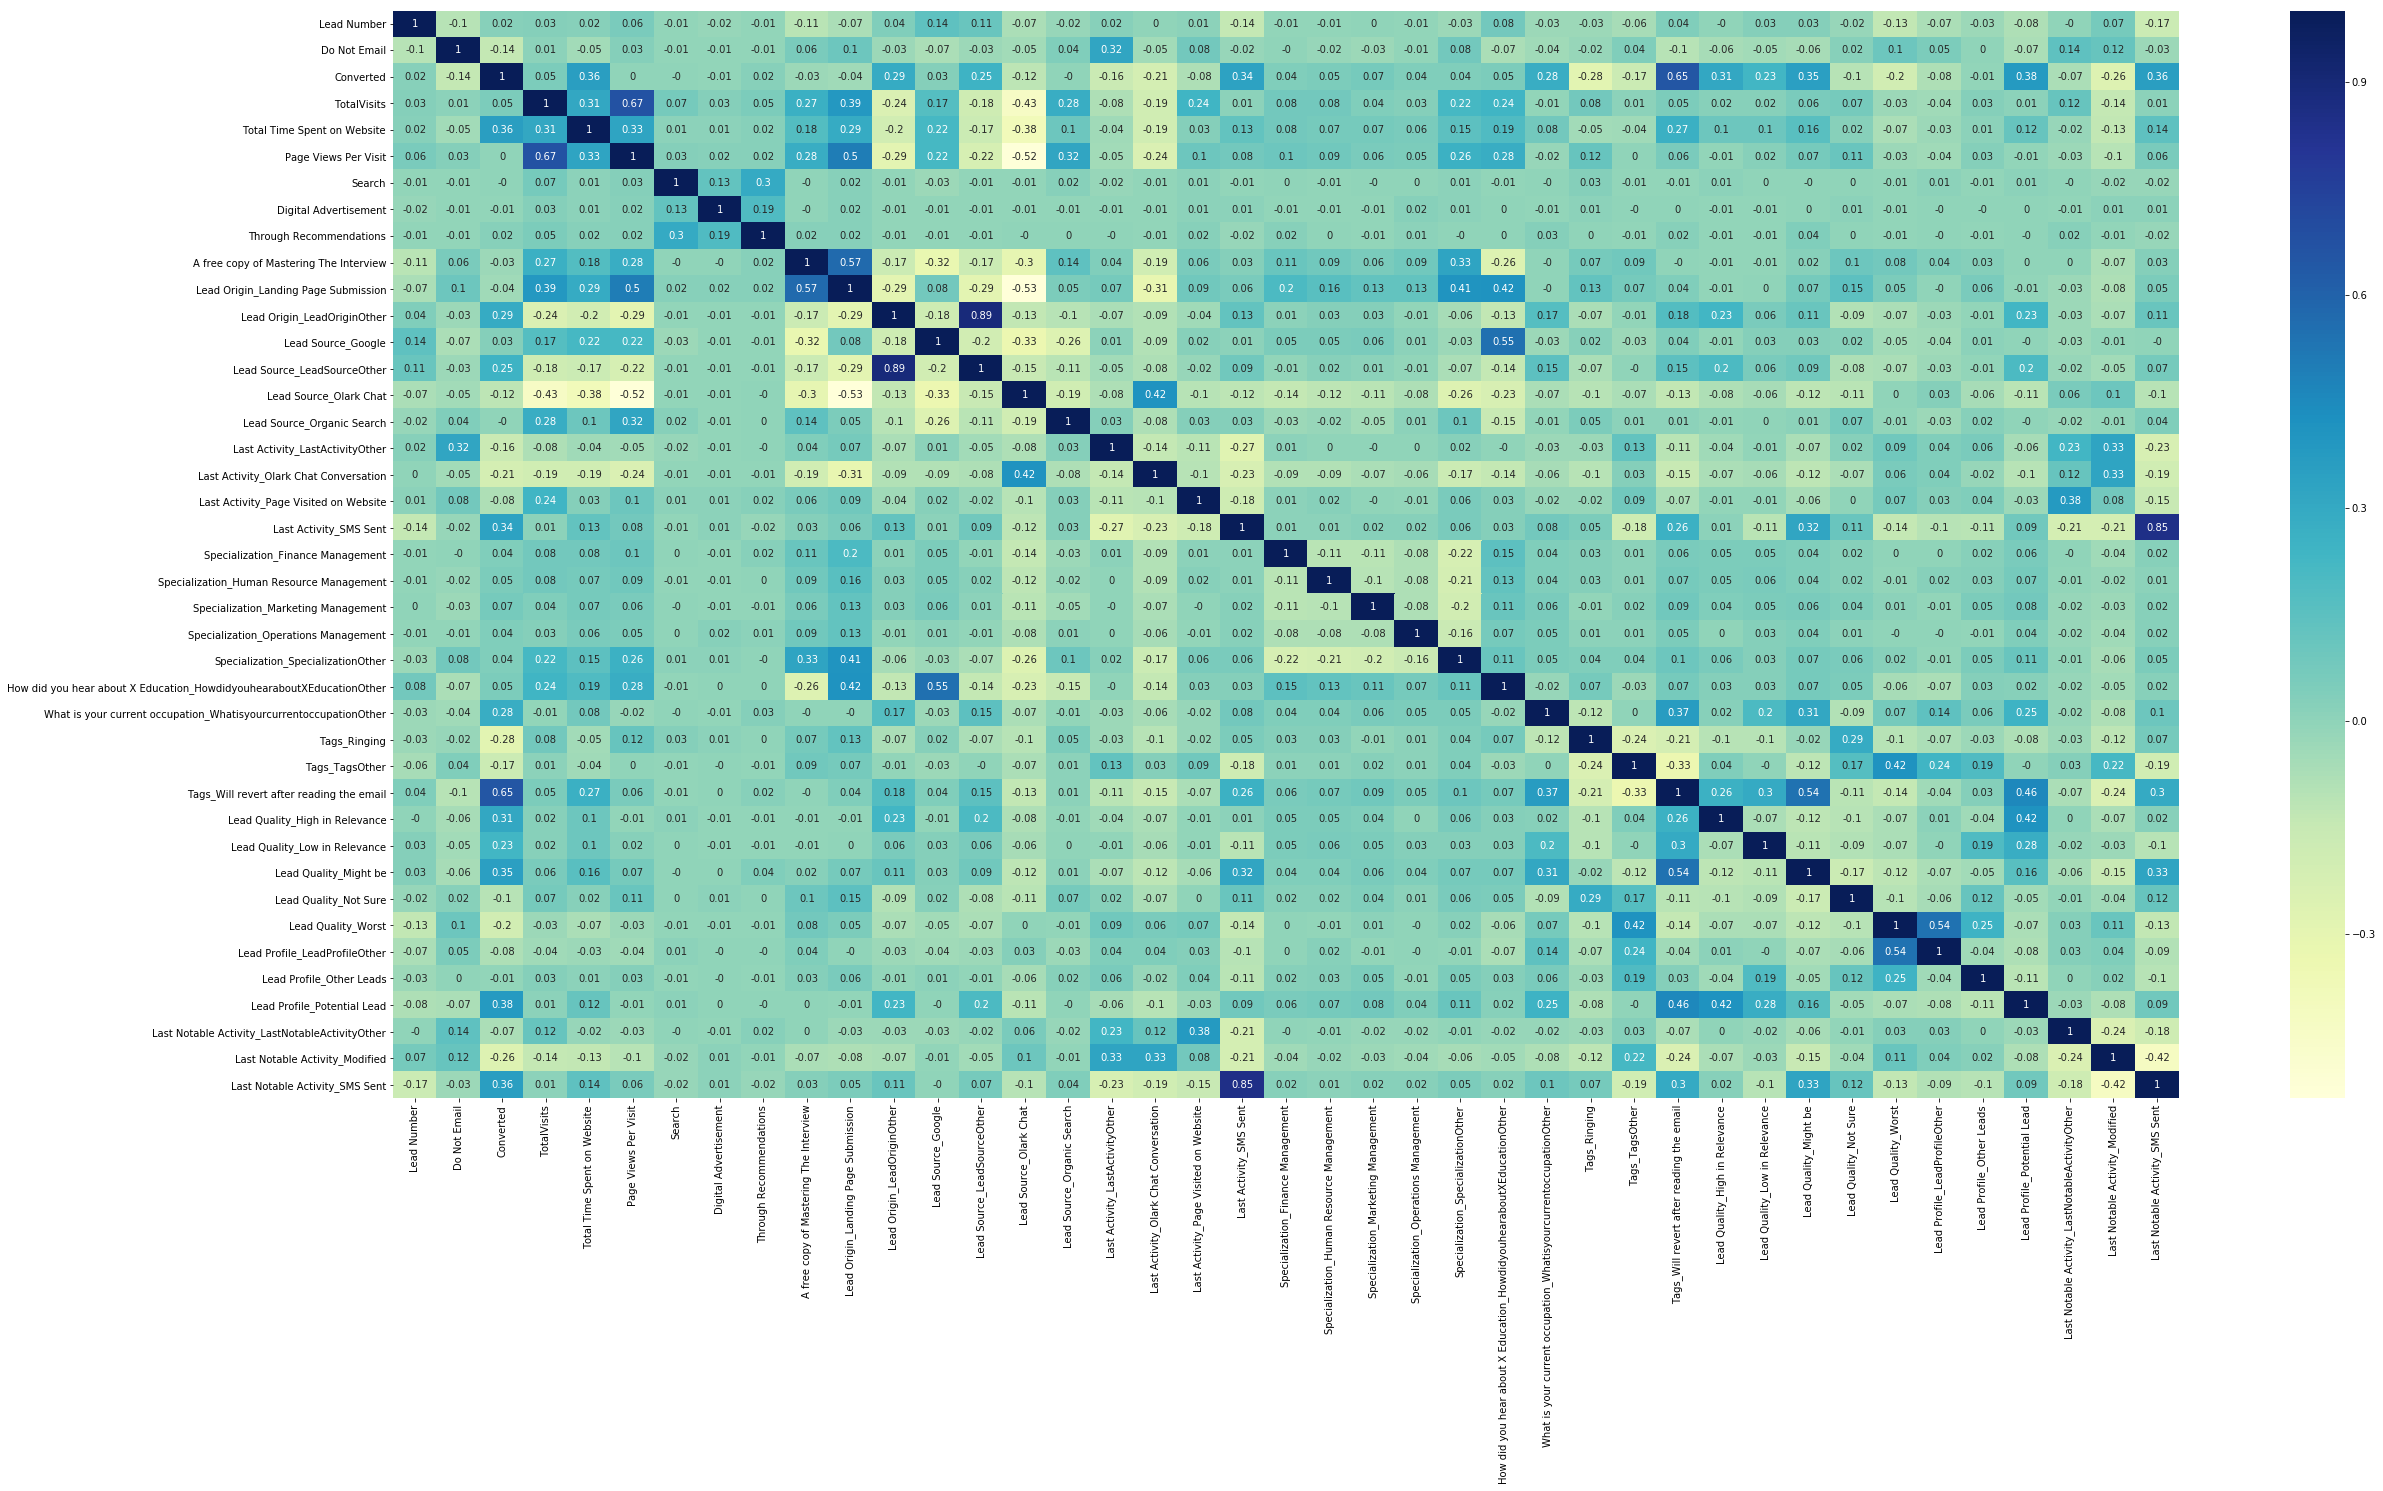

In [1594]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,20))        # Size of the figure
sns.heatmap(DF_Leads.corr().round(2),cmap = "YlGnBu",annot = True)
plt.show()

###  5: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running the First Training Model

In [1595]:
import statsmodels.api as sm

In [1596]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1581.7
Date:                Mon, 26 Aug 2019   Deviance:                       3163.5
Time:                        22:25:53   Pearson chi2:                 2.21e+04
No. Iterations:                    19   Covariance Type:             nonrobust
========================================================================================================================================
                                                                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -1.7526      0.194     -9.050      0.000      -2.132      -1.373
Do Not Email                                                            -0.9272      0.235     -3.952      0.000      -1.387      -0.467
TotalVisits                                                              0.3558      0.062      5.774      0.000       0.235       0.477
Total Time Spent on Website                                              1.0654      0.054     19.666      0.000       0.959       1.172
Page Views Per Visit                                                    -0.2813      0.074     -3.789      0.000      -0.427      -0.136
Search                                                                   0.6894      1.130      0.610      0.542      -1.526       2.905
Digital Advertisement                                                  -23.8823   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Through Recommendations                                                  3.6325      2.006      1.811      0.070      -0.299       7.564
A free copy of Mastering The Interview                                  -0.0492      0.188     -0.262      0.793      -0.417       0.319
Lead Origin_Landing Page Submission                                     -0.1024      0.212     -0.484      0.628      -0.517       0.312
Lead Origin_LeadOriginOther                                              3.9788      0.469      8.490      0.000       3.060       4.897
Lead Source_Google                                                       0.3051      0.170      1.797      0.072      -0.028       0.638
Lead Source_LeadSourceOther                                             -0.1209      0.416     -0.290      0.771      -0.937       0.695
Lead Source_Olark Chat                                                   1.4322      0.220      6.525      0.000       1.002       1.862
Lead Source_Organic Search                                               0.1763      0.181      0.973      0.331      -0.179       0.532
Last Activity_LastActivityOther                                         -0.9115      0.222     -4.109      0.000      -1.346      -0.477
Last Activity_Olark Chat Conversation                                   -1.7293      0.246     -7.038      0.000      -2.211      -1.248
Last Activity_Page Visited on Website                                   -1.1095      0.273     -4.067      0.000      -1.644      -0.575
Last Activity_SMS Sent                                                   0.3058      0.220      1.392      0.164      -0.125       0.736
Specialization_Finance Management                                       -0.0675      0.244     -0.277      0.782      -0.545       0.410
Specializat

###  6: Feature Selection Using RFE

In [1597]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1598]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [1599]:
rfe.support_

array([ True, False,  True, False, False, False, False, False, False,
        True, False, False,  True, False,  True,  True,  True, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True,  True, False, False,  True, False, False, False,
       False, False,  True])

In [1600]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 13),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 14),
 ('Search', False, 16),
 ('Digital Advertisement', False, 12),
 ('Through Recommendations', False, 3),
 ('A free copy of Mastering The Interview', False, 25),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_LeadOriginOther', True, 1),
 ('Lead Source_Google', False, 22),
 ('Lead Source_LeadSourceOther', False, 23),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 24),
 ('Last Activity_LastActivityOther', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', False, 7),
 ('Specialization_Finance Management', False, 27),
 ('Specialization_Human Resource Management', False, 11),
 ('Specialization_Marketing Management', False, 26),
 ('Specialization_Operations Management', False, 18),
 ('Specialization_SpecializationOther

In [1601]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_LeadOriginOther', 'Lead Source_Olark Chat',
       'Last Activity_LastActivityOther',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Lead Quality_High in Relevance', 'Lead Quality_Low in Relevance',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [1602]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Search',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_LeadSourceOther', 'Lead Source_Organic Search',
       'Last Activity_SMS Sent', 'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management',
       'Specialization_SpecializationOther',
       'How did you hear about X Education_HowdidyouhearaboutXEducationOther',
       'What is your current occupation_WhatisyourcurrentoccupationOther',
       'Tags_TagsOther', 'Lead Quality_Might be', 'Lead Quality_Not Sure',
       'Lead Profile_LeadProfileOther', 'Lead Profile_Other Leads',
       'Lead Profile_Potential Lead',
       'Last Notable Activity_LastNotableActivityOther',
       'Last Notable Activity_Modified'],
      d

##### Assessing the model with StatsModels

In [1603]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1636.1
Date:                Mon, 26 Aug 2019   Deviance:                       3272.3
Time:                        22:25:54   Pearson chi2:                 2.57e+04
No. Iterations:                     7   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.7343      0.079    -21.955      0.000      -1.889      -1.579
Do Not Email                                -1.0166      0.225     -4.509      0.000      -1.458      -0.575
Total Time Spent on Website                  1.0710      0.052     20.453      0.000       0.968       1.174
Lead Origin_LeadOriginOther                  3.8368      0.236     16.264      0.000       3.374       4.299
Lead Source_Olark Chat                       1.4128      0.131     10.760      0.000       1.155       1.670
Last Activity_LastActivityOther             -0.8411      0.156     -5.406      0.000      -1.146      -0.536
Last Activity_Olark Chat Conversation       -1.6466      0.193     -8.532      0.000      -2.025      -1.268
Last Activity_Page Visited on Website       -0.6047      0.193     -3.135      0.002      -0.983      -0.227
Tags_Ringing                                -3.5245      0.249    -14.142      0.000      -4.013      -3.036
Tags_Will revert after reading the email     4.2012      0.197     21.312      0.000       3.815       4.588
Lead Quality_High in Relevance               2.4856      0.247     10.083      0.000       2.002       2.969
Lead Quality_Low in Relevance                0.9677      0.214      4.515      0.000       0.548       1.388
Lead Quality_Worst                          -2.0549      0.354     -5.806      0.000      -2.749      -1.361
Last Notable Activity_SMS Sent               1.8342      0.117     15.709      0.000       1.605       2.063
============================================================================================================
"""

In [1604]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2179    0.079640
3504    0.004648
5038    0.059677
3460    0.201764
7421    0.020182
421     0.094207
5351    0.009137
7788    0.019394
8241    0.380252
1307    0.994237
dtype: float64

In [1605]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07964045, 0.00464835, 0.05967706, 0.20176437, 0.02018153,
       0.09420738, 0.00913706, 0.01939381, 0.38025204, 0.99423733])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [1606]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.079640,2179
1,0,0.004648,3504
2,0,0.059677,5038
3,0,0.201764,3460
4,1,0.020182,7421


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [1607]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.079640,2179,0
1,0,0.004648,3504,0
2,0,0.059677,5038,0
3,0,0.201764,3460,0
4,1,0.020182,7421,0


In [1608]:
from sklearn import metrics

In [1609]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3753  204]
 [ 442 1947]]


In [1610]:
# Predicted     not_Converted    Converted
# Actual
# not_Converted        3753      204
# Converted            442       1947  

In [1611]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8982035928143712


#### Checking VIFs

In [1612]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1613]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,1.88
3,Lead Source_Olark Chat,1.62
12,Last Notable Activity_SMS Sent,1.51
1,Total Time Spent on Website,1.41
5,Last Activity_Olark Chat Conversation,1.36
2,Lead Origin_LeadOriginOther,1.29
4,Last Activity_LastActivityOther,1.26
0,Do Not Email,1.25
9,Lead Quality_High in Relevance,1.25
10,Lead Quality_Low in Relevance,1.25


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [1614]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3753,  204],
       [ 442, 1947]])

In [1615]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8982035928143712

## Metrics beyond simply accuracy

In [1616]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1617]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.814985349518627

In [1618]:
# Let us calculate specificity
TN / float(TN+FP)

0.9484457922668689

In [1619]:
# Calculate false postive rate - predicting conversion when customer does not have Converted
print(FP/ float(TN+FP))

0.05155420773313116


In [1620]:
# positive predictive value 
print (TP / float(TP+FP))

0.905160390516039


In [1621]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8946364719904648


An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1622]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1623]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

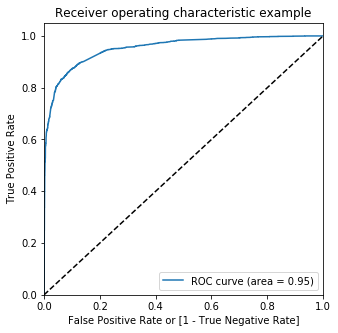

In [1624]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### 7: Finding Optimal Cutoff Point

In [1625]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.079640,2179,0,1,0,0,0,0,0,0,0,0,0
1,0,0.004648,3504,0,1,0,0,0,0,0,0,0,0,0
2,0,0.059677,5038,0,1,0,0,0,0,0,0,0,0,0
3,0,0.201764,3460,0,1,1,1,0,0,0,0,0,0,0
4,1,0.020182,7421,0,1,0,0,0,0,0,0,0,0,0


In [1626]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376458  1.000000  0.000000
0.1   0.1  0.778286  0.961490  0.667678
0.2   0.2  0.847305  0.936794  0.793278
0.3   0.3  0.884809  0.884470  0.885014
0.4   0.4  0.893949  0.848891  0.921152
0.5   0.5  0.898204  0.814985  0.948446
0.6   0.6  0.895367  0.789452  0.959313
0.7   0.7  0.882446  0.733780  0.972201
0.8   0.8  0.866057  0.670992  0.983826
0.9   0.9  0.845099  0.600251  0.992924


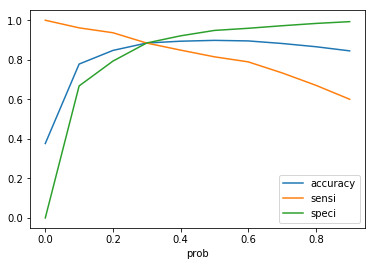

In [1627]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [1628]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.079640,2179,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.004648,3504,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.059677,5038,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.201764,3460,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.020182,7421,0,1,0,0,0,0,0,0,0,0,0,0


In [1629]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.884809328710999

In [1630]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3502,  455],
       [ 276, 2113]])

In [1631]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1632]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.884470489744663

In [1633]:
# Let us calculate specificity
TN / float(TN+FP)

0.8850138994187515

In [1634]:
# Calculate false postive rate - predicting Conversion when customer does not have Converted
print(FP/ float(TN+FP))

0.11498610058124842


In [1635]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8228193146417445


In [1636]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9269454737956591


### 8: Making predictions on the test set

In [1637]:
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

In [1638]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_LeadOriginOther,Lead Source_Olark Chat,Last Activity_LastActivityOther,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Tags_Ringing,Tags_Will revert after reading the email,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Worst,Last Notable Activity_SMS Sent
5121,0,-0.813423,0,0,0,0,0,0,0,0,0,0,0
686,0,0.922378,0,0,0,0,0,0,1,0,0,0,0
4091,0,1.683176,0,0,1,0,0,0,0,0,0,0,0
737,0,-0.883594,1,0,0,0,0,0,1,1,0,0,0
5230,0,-0.883594,0,1,0,0,0,0,0,0,0,0,0


In [1639]:
X_test_sm = sm.add_constant(X_test)

## Making predictions on the test set

In [1640]:
y_test_pred = res.predict(X_test_sm)

In [1641]:
y_test_pred[:10]

5121    0.068788
686     0.969375
4091    0.315905
737     0.999608
5230    0.219625
5394    0.280194
7614    0.015139
5294    0.346416
2258    0.461811
8682    0.125419
dtype: float64

In [1642]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1643]:
# Let's see the head
y_pred_1.head()

,0
5121,0.068788
686,0.969375
4091,0.315905
737,0.999608
5230,0.219625


In [1644]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1645]:
# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index

In [1646]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1647]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1648]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,5121,0.068788
1,1,686,0.969375
2,1,4091,0.315905
3,1,737,0.999608
4,0,5230,0.219625


In [1649]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [1650]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead Number','Converted','Converted_Prob'], axis=1)

In [1651]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,5121,0,0.068788
1,686,1,0.969375
2,4091,1,0.315905
3,737,1,0.999608
4,5230,0,0.219625


In [1652]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [1653]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,5121,0,0.068788,0
1,686,1,0.969375,1
2,4091,1,0.315905,1
3,737,1,0.999608,1
4,5230,0,0.219625,0


In [1654]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8834558823529411

In [1655]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1469,  207],
       [ 110,  934]])

In [1656]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1657]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8946360153256705

In [1658]:
# Let us calculate specificity
TN / float(TN+FP)

0.8764916467780429

## Summary
#### Accuracy on the test (0.89) and train data (0.88)  is almost SAME 
Main factors                coefficient

Tags_Will revert after reading the email	4.2012	
Lead Origin_LeadOriginOther	3.8368
Lead Quality_High in Relevance	2.4856
Last Notable Activity_SMS Sent	1.8342
Lead Source_Olark Chat	1.4128
Total Time Spent on Website	1.0710
Lead Quality_Low in Relevance	0.9677
Last Activity_LastActivityOther	-0.8411	
Last Activity_Page Visited on Website	-0.6047	
Do Not Email	-1.0166	
Last Activity_Olark Chat Conversation	-1.6466	
Lead Quality_Worst	-2.0549	
Tags_Ringing	-3.5245	
	

	

	

## Business Goal 1
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


In [1659]:
y_train_leads = y_train_pred_final[['Lead Number', 'Converted', 'Converted_Prob','final_predicted']]
y_train_leads.shape

(6346, 4)

In [1660]:
y_test_leads = y_pred_final[['Lead Number', 'Converted', 'Converted_Prob','final_predicted']]
y_test_leads.shape

(2720, 4)

In [1661]:
# Concat the data row wise as columns are same in both dataset
df_Lead_score = pd.concat([y_train_leads, y_test_leads],axis=0)

In [1662]:
df_Lead_score.shape

(9066, 4)

In [1663]:
# Converting the probability into lead score
df_Lead_score['Lead Score'] = (round(df_Lead_score.Converted_Prob,2)*100).astype(int)
df_Lead_score.head()

,Lead Number,Converted,Converted_Prob,final_predicted,Lead Score
0,2179,0,0.079640,0,8
1,3504,0,0.004648,0,0
2,5038,0,0.059677,0,6
3,3460,0,0.201764,0,20
4,7421,1,0.020182,0,2


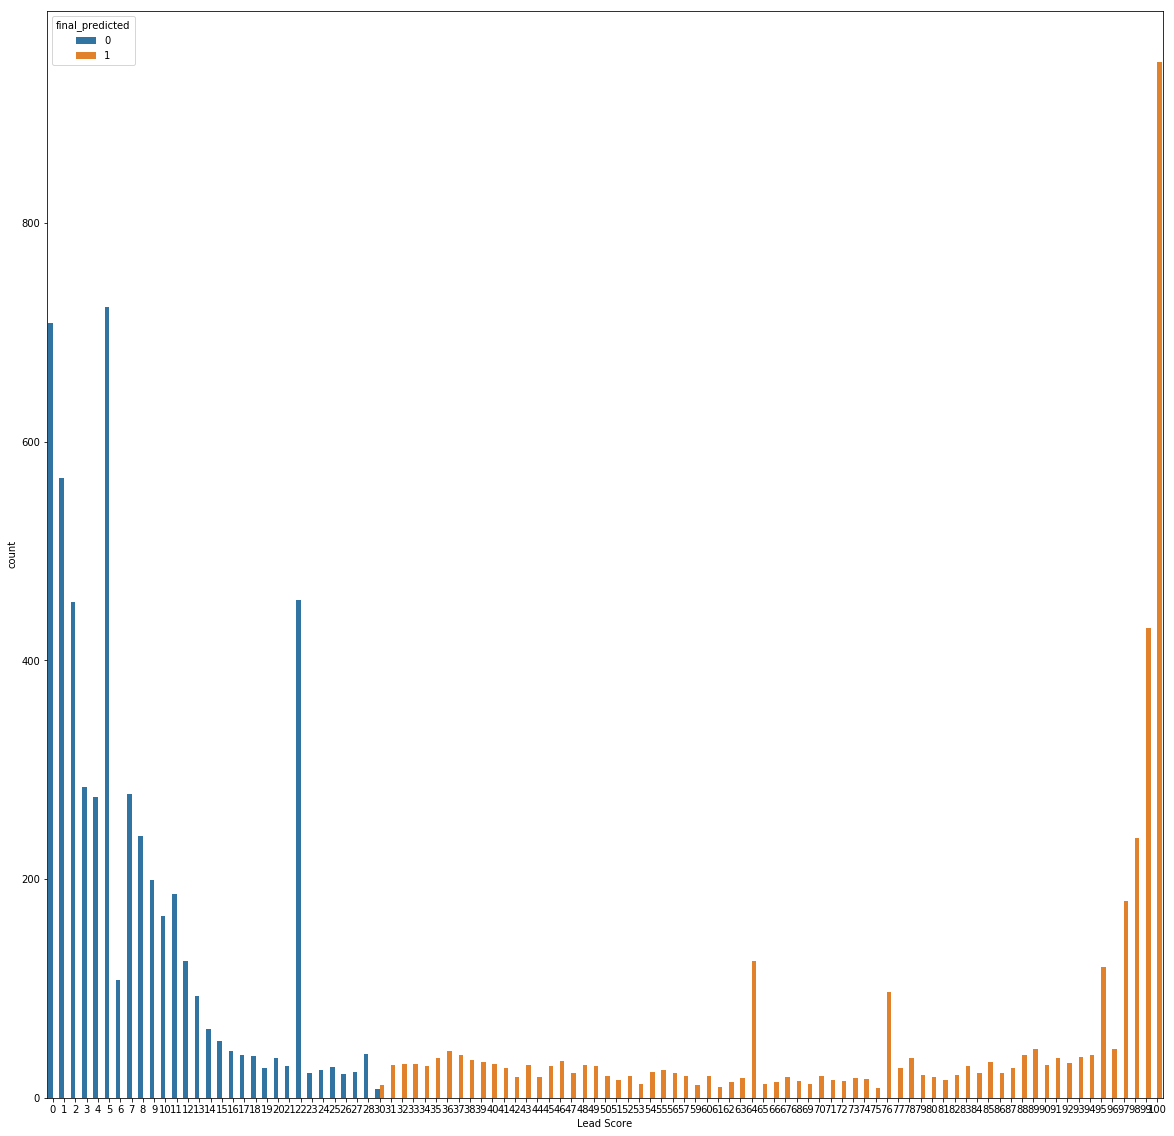

In [1664]:
plt.figure(figsize=(20, 20))
sns.countplot(x='Lead Score',hue='final_predicted', data=df_Lead_score)
plt.show()